In [ ]:
# ========= Colab one-time setup (run once) =========
#!pip -q install tensorflow==2.16.1  # or keep Colab's default TF 2.x
!pip -q install opencv-python

import zipfile, os, glob

# === Uploaded zip file paths in Colab ===
TRAIN_ZIP = "/content/Stuctures_Dataset.zip"  # <-- training dataset
TEST_ZIP  = "/content/Dataset_test.zip"       # <-- test dataset

# === Extraction folders ===
DATA_ROOT = "/content/data_structures"
TRAIN_DIR = os.path.join(DATA_ROOT, "train")
TEST_DIR  = os.path.join(DATA_ROOT, "test")
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

def safe_unzip(zip_path, out_dir):
    if not os.path.isfile(zip_path):
        raise FileNotFoundError(f"Couldn't find: {zip_path}. Upload it to Colab first.")
    if any(os.scandir(out_dir)):  # Skip if already extracted
        print(f"Skip: {out_dir} already has files.")
        return
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(out_dir)
    print(f"Extracted {os.path.basename(zip_path)} -> {out_dir}")

def count_by_class(root):
    if not os.path.isdir(root):
        return {}
    classes = sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))])
    return {c: len(glob.glob(os.path.join(root, c, "*"))) for c in classes}

# === Unzip both datasets ===
safe_unzip(TRAIN_ZIP, TRAIN_DIR)
safe_unzip(TEST_ZIP, TEST_DIR)

# === Quick sanity check ===
# actual paths after unzip
TRAIN_DIR = "/content/data_structures/train/Stuctures_Dataset"
TEST_DIR  = "/content/data_structures/test/Dataset_test/Dataset_test_original_1478"

def count_by_class(root):
    classes = sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))])
    return {c: len(glob.glob(os.path.join(root, c, "*"))) for c in classes}

print("Train set counts:")
print(count_by_class(TRAIN_DIR))

print("\nTest set counts:")
print(count_by_class(TEST_DIR))



Extracted Stuctures_Dataset.zip -> /content/data_structures/train
Extracted Dataset_test.zip -> /content/data_structures/test
Train set counts:
{'altar': 829, 'apse': 514, 'bell_tower': 1059, 'column': 1919, 'dome(inner)': 616, 'dome(outer)': 1177, 'flying_buttress': 407, 'gargoyle': 1571, 'stained_glass': 1033, 'vault': 1110}

Test set counts:
{'altar': 140, 'apse': 57, 'bell_tower': 171, 'column': 210, 'dome(inner)': 86, 'dome(outer)': 168, 'flying_buttress': 78, 'gargoyle': 240, 'stained_glass': 163, 'vault': 164}


Train classes & counts:
{'altar': 829, 'apse': 514, 'bell_tower': 1059, 'column': 1919, 'dome(inner)': 616, 'dome(outer)': 1177, 'flying_buttress': 407, 'gargoyle': 1571, 'stained_glass': 1033, 'vault': 1110}

Test classes & counts:
{'altar': 140, 'apse': 57, 'bell_tower': 170, 'column': 210, 'dome(inner)': 86, 'dome(outer)': 168, 'flying_buttress': 78, 'gargoyle': 240, 'stained_glass': 163, 'vault': 164}


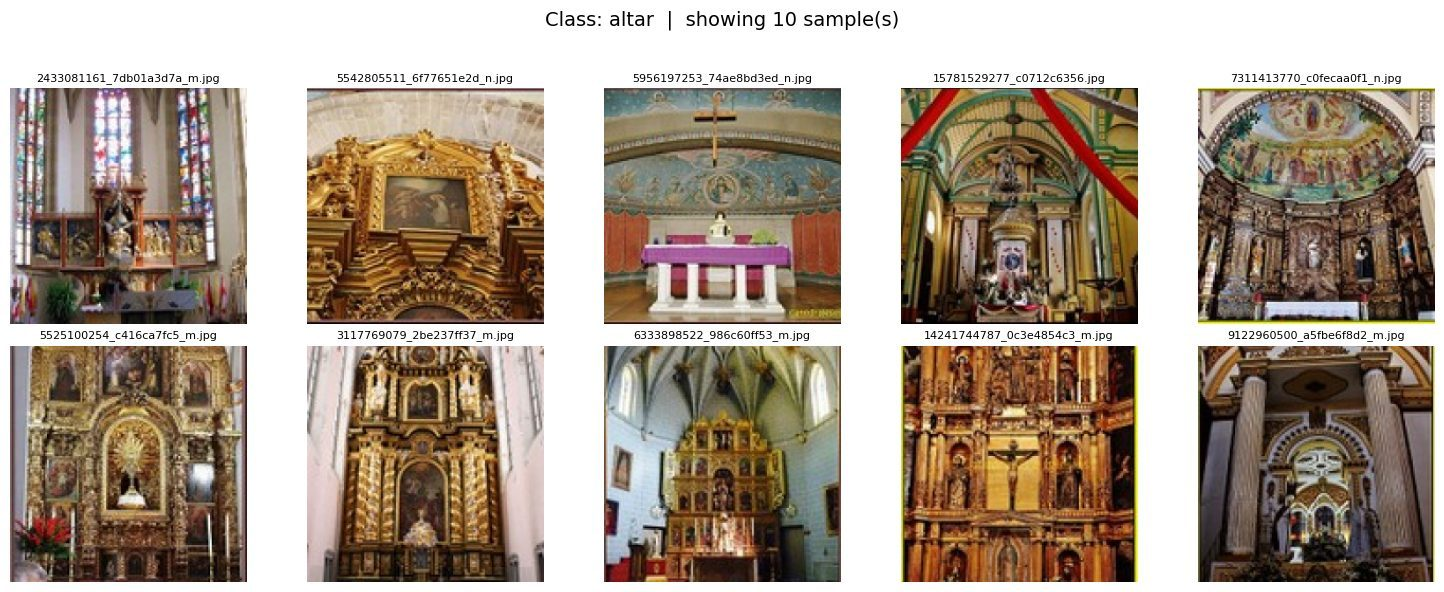

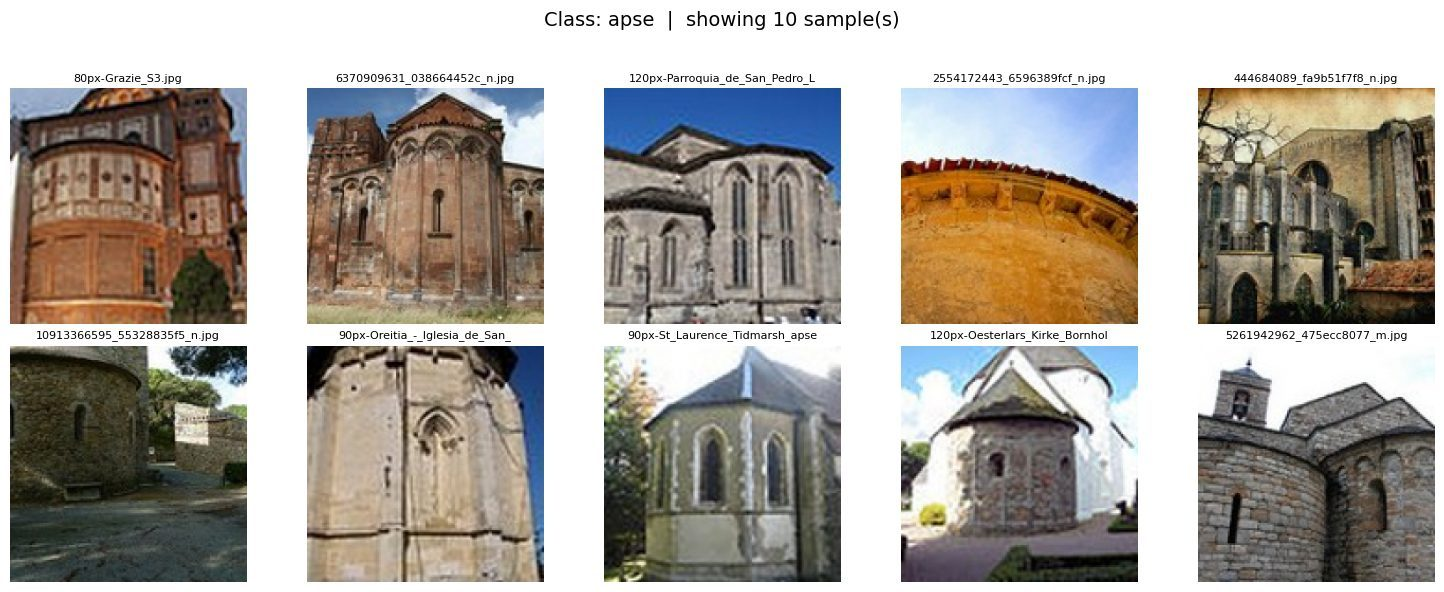

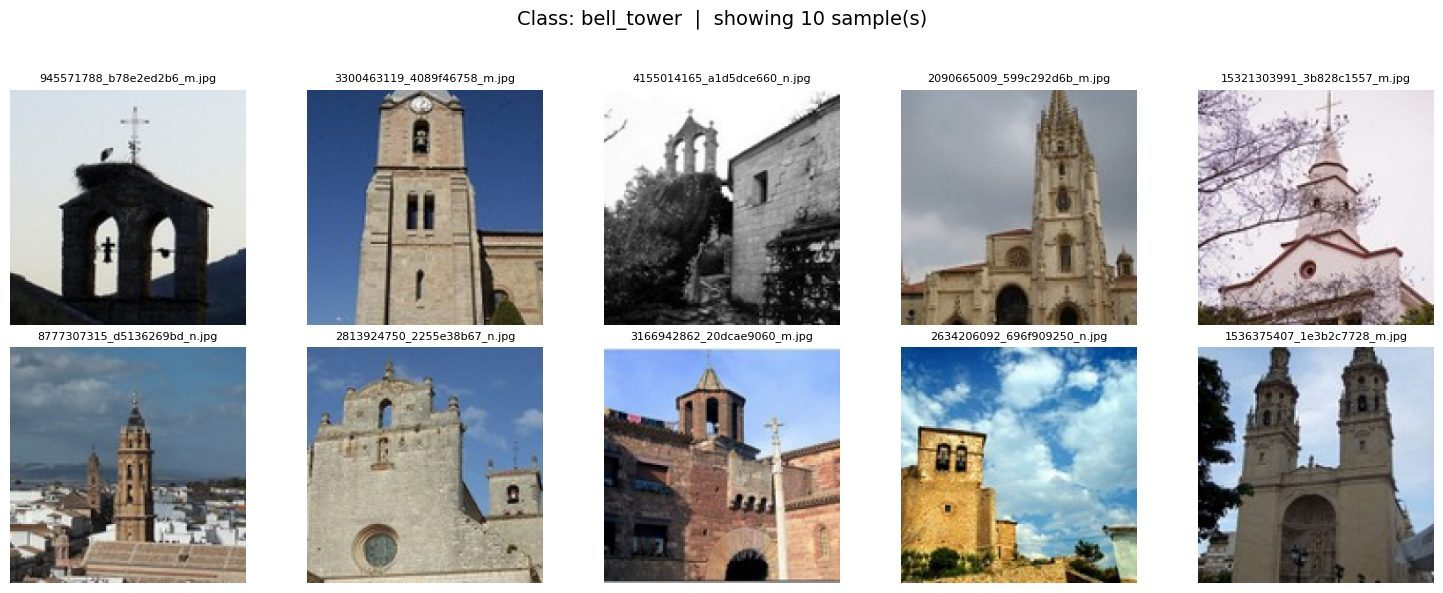

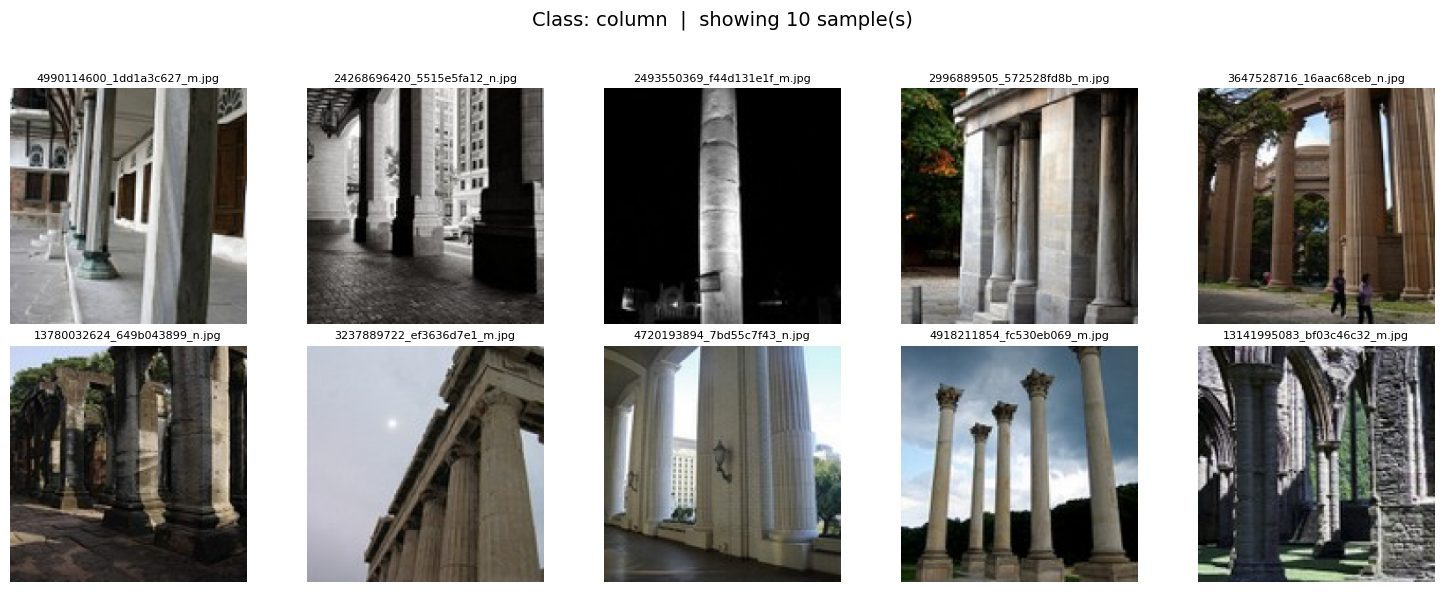

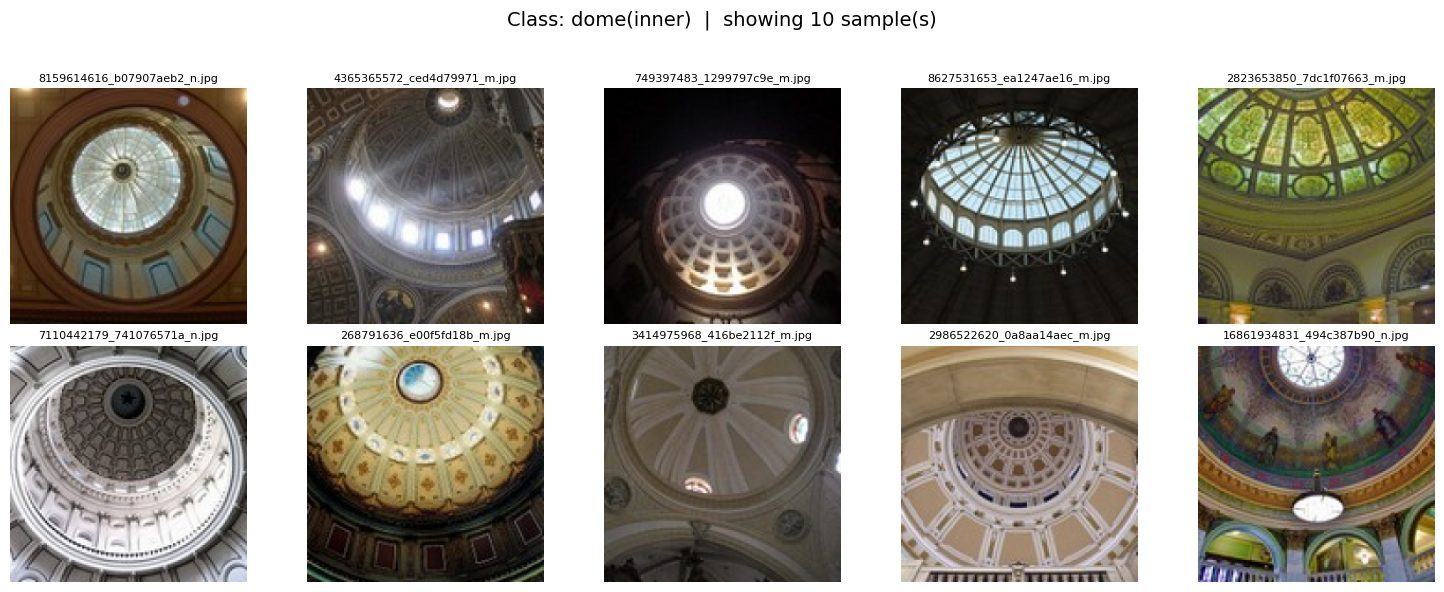

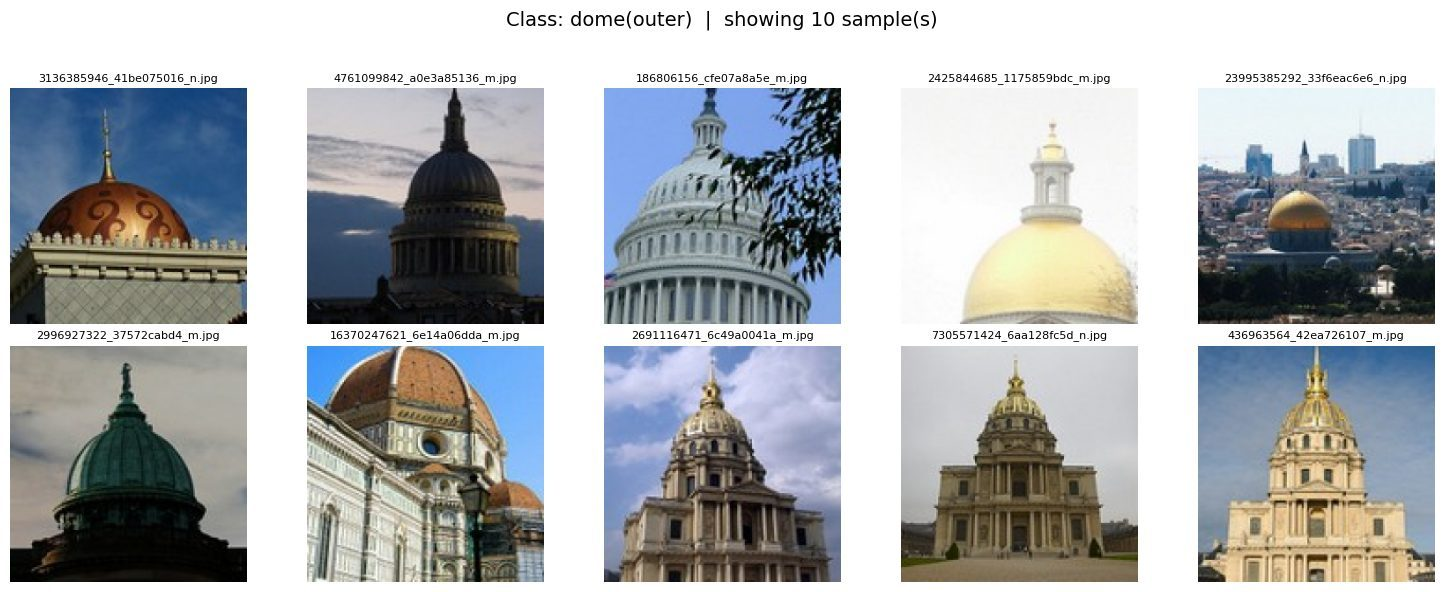

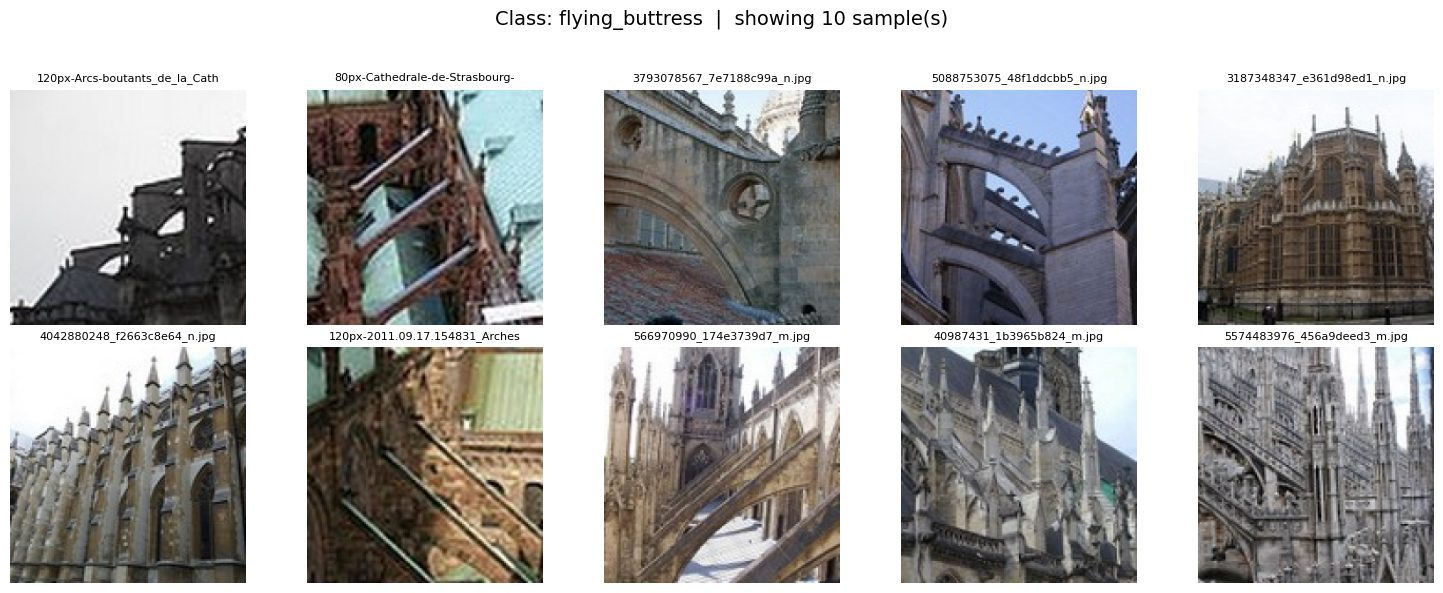

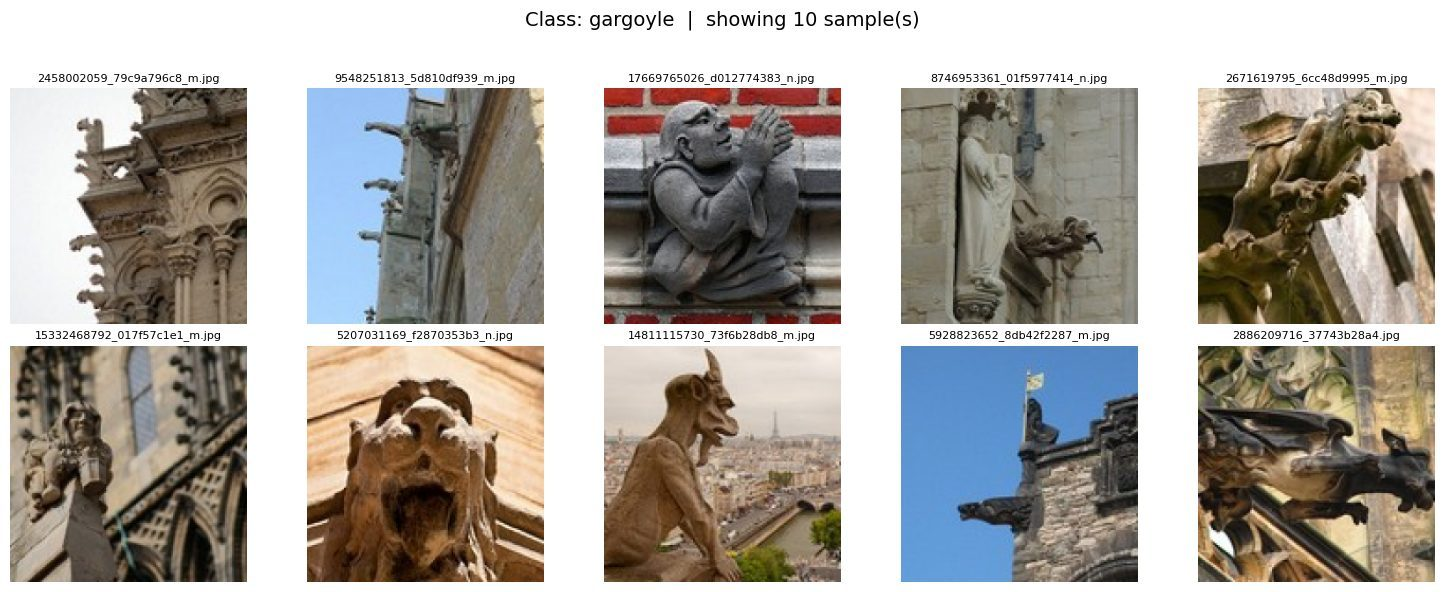

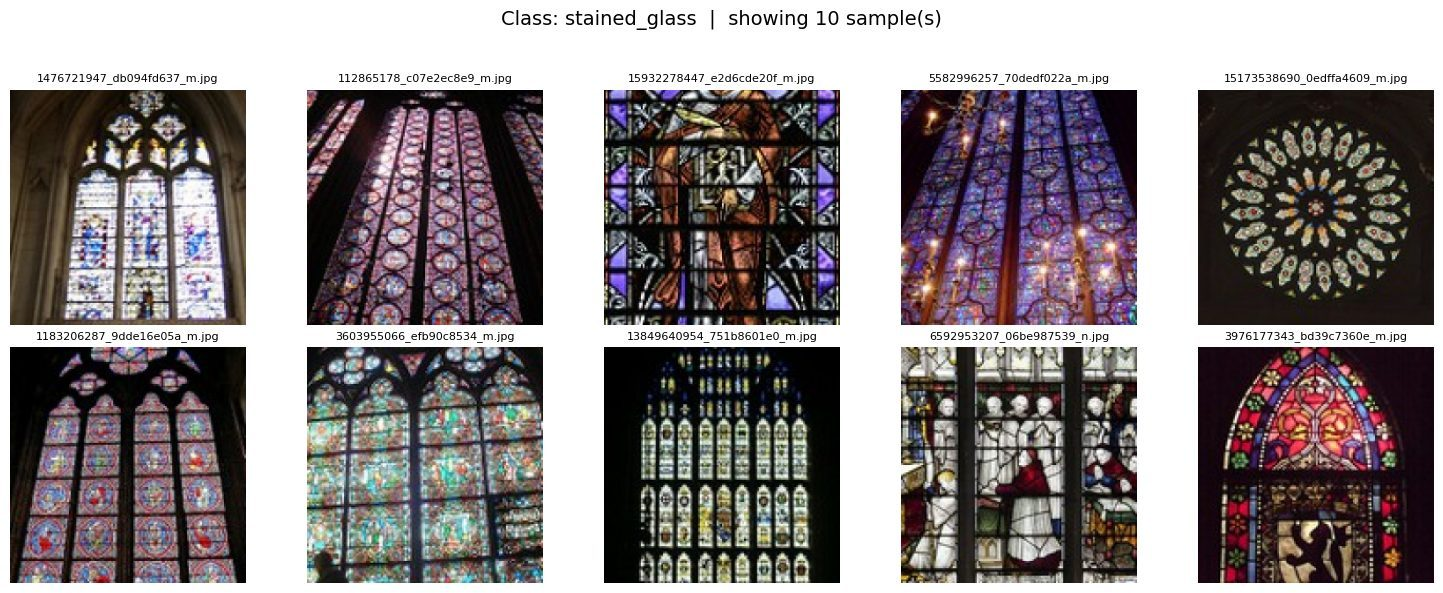

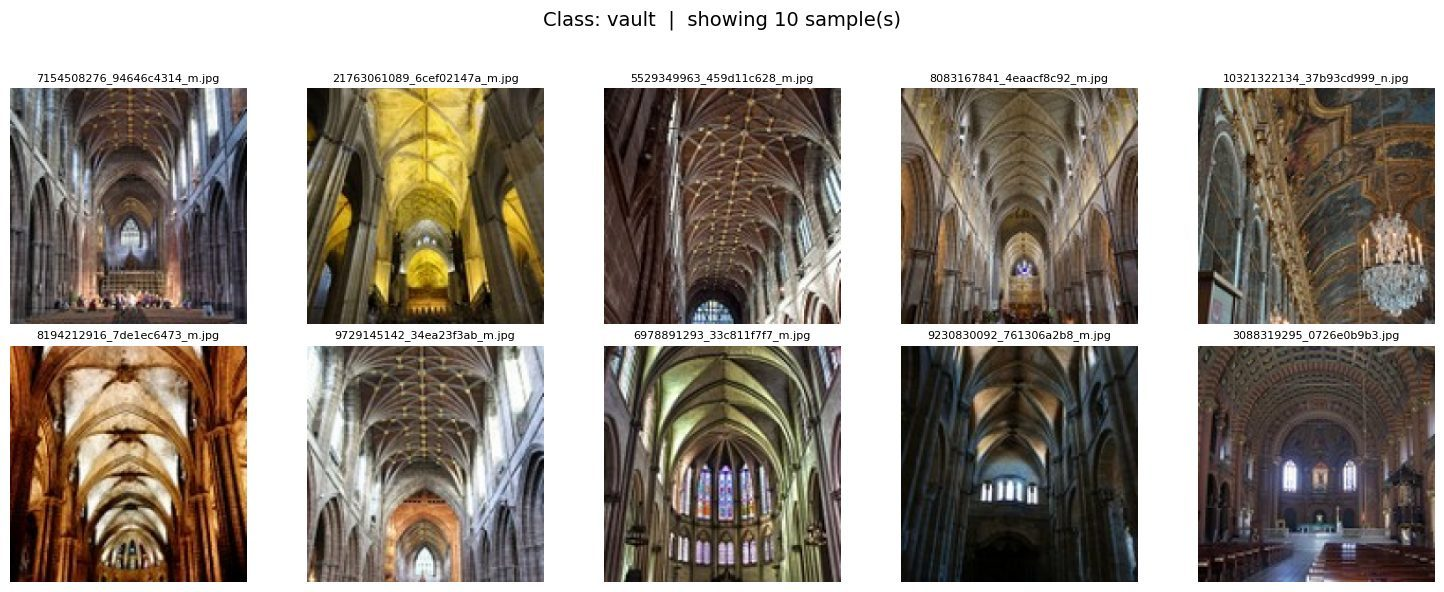

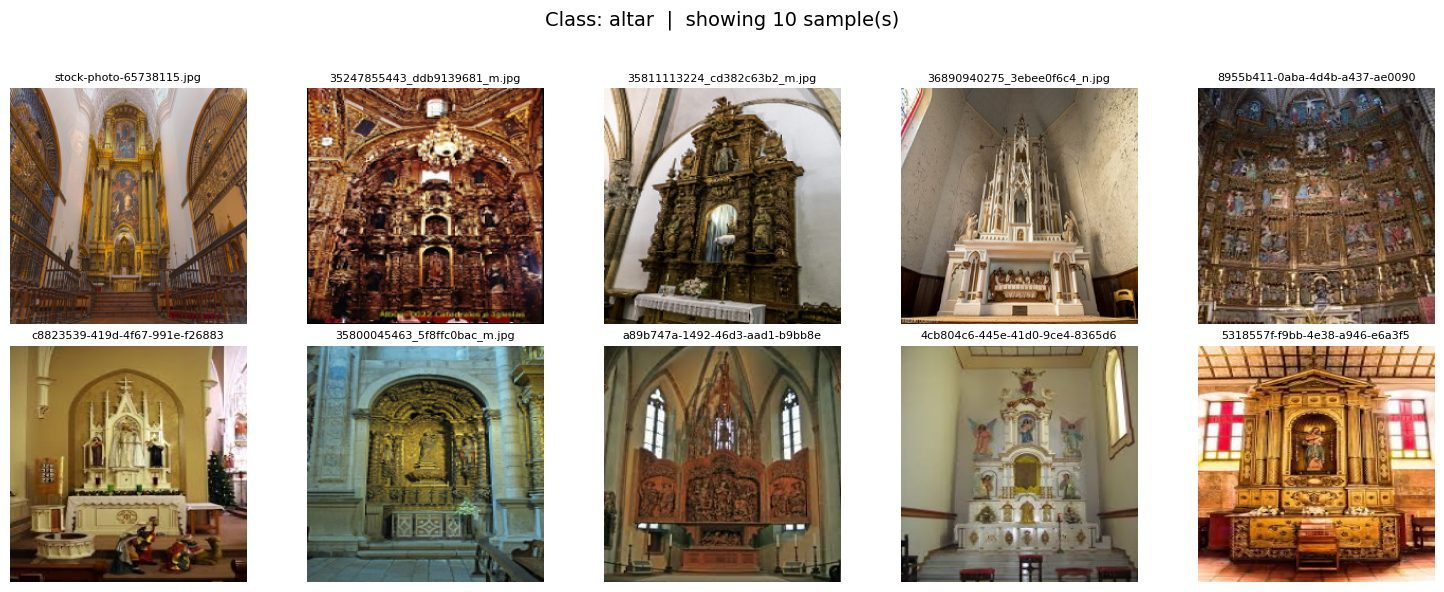

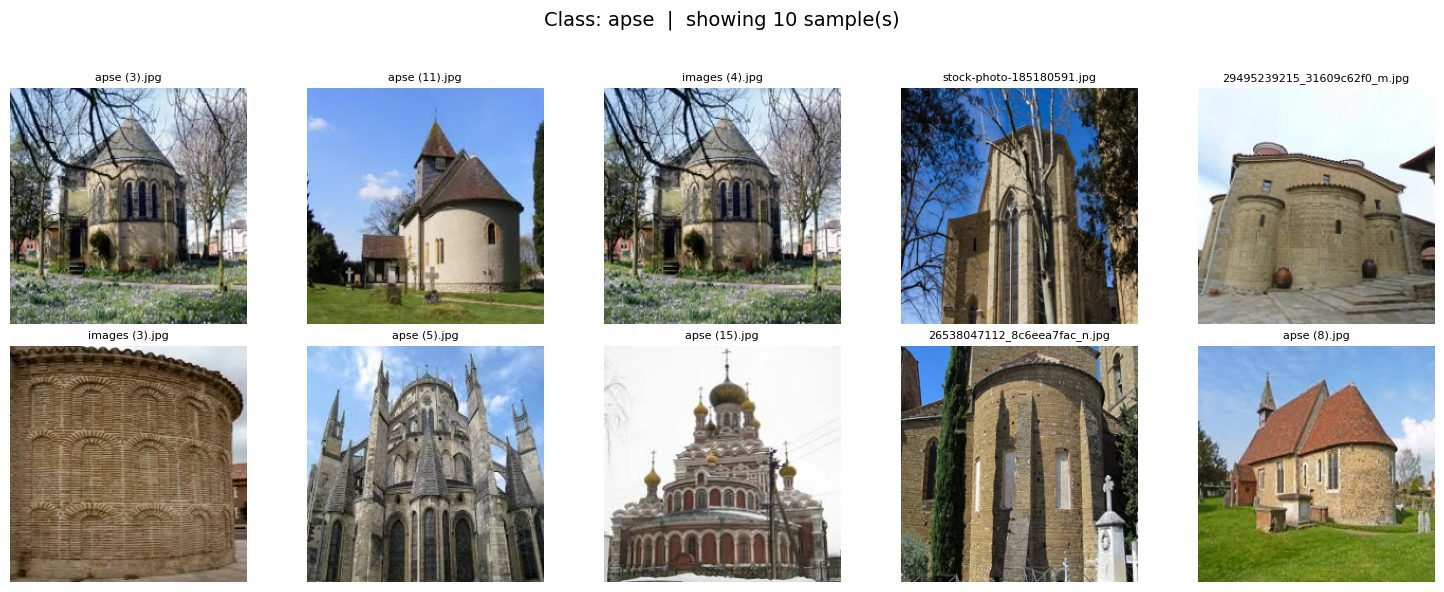

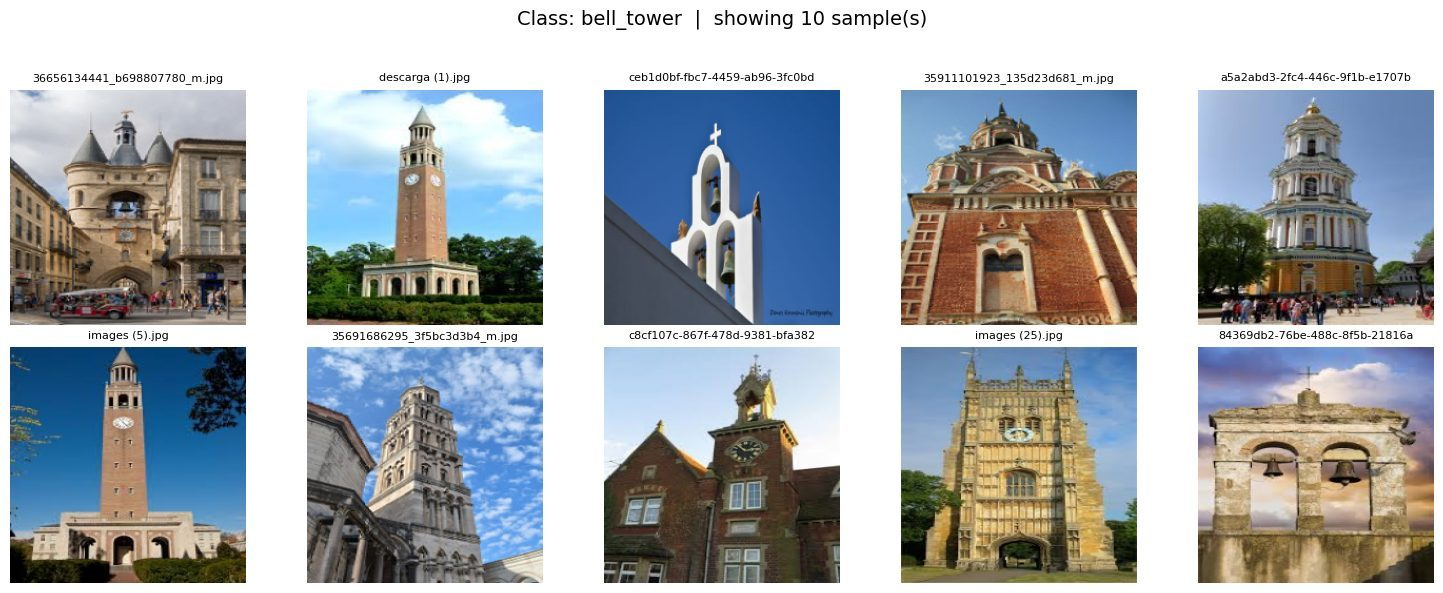

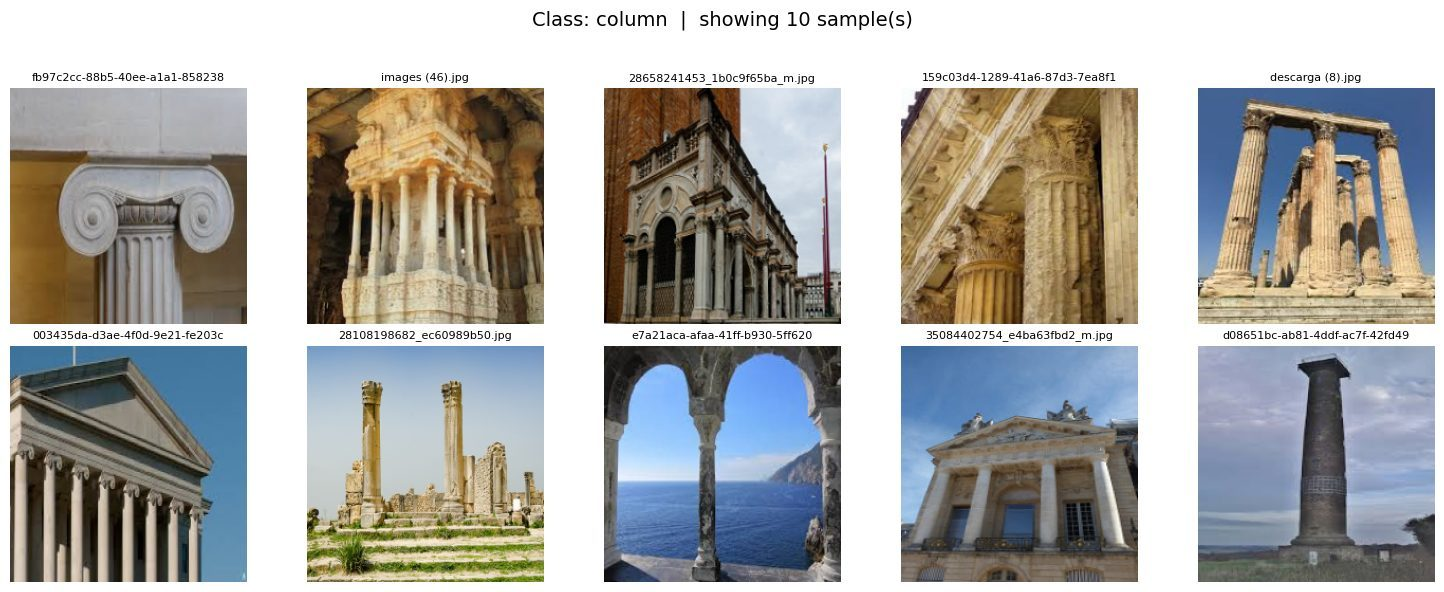

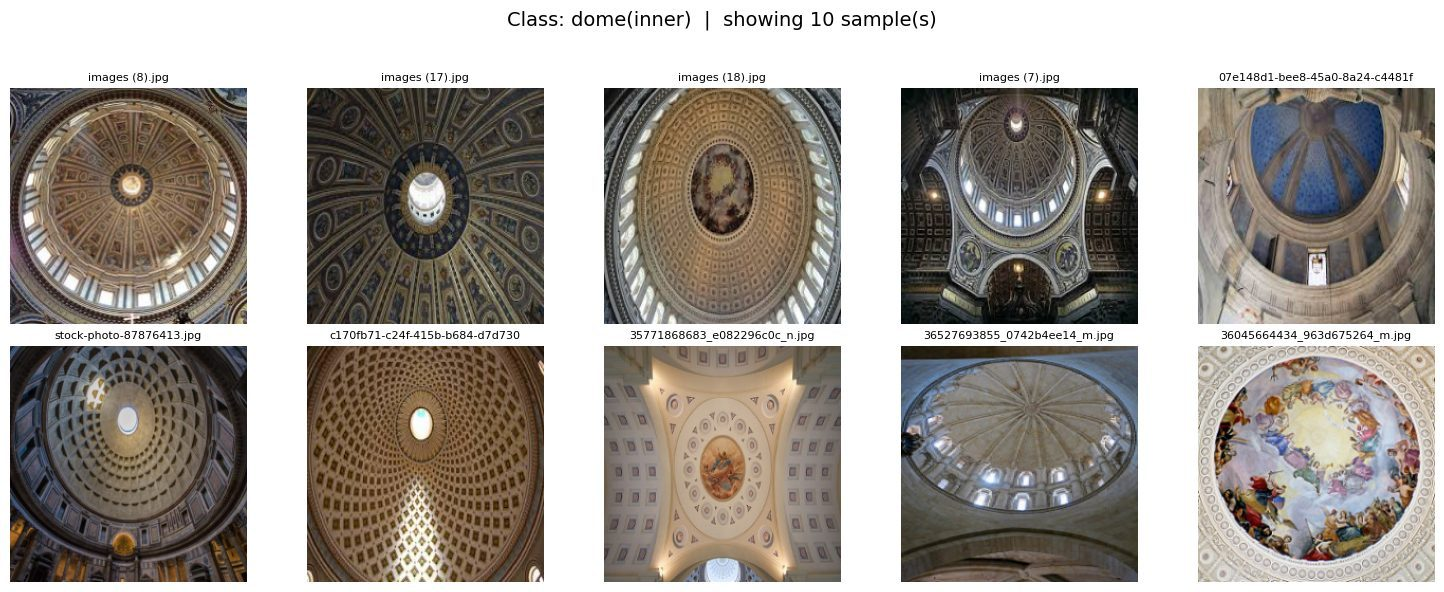

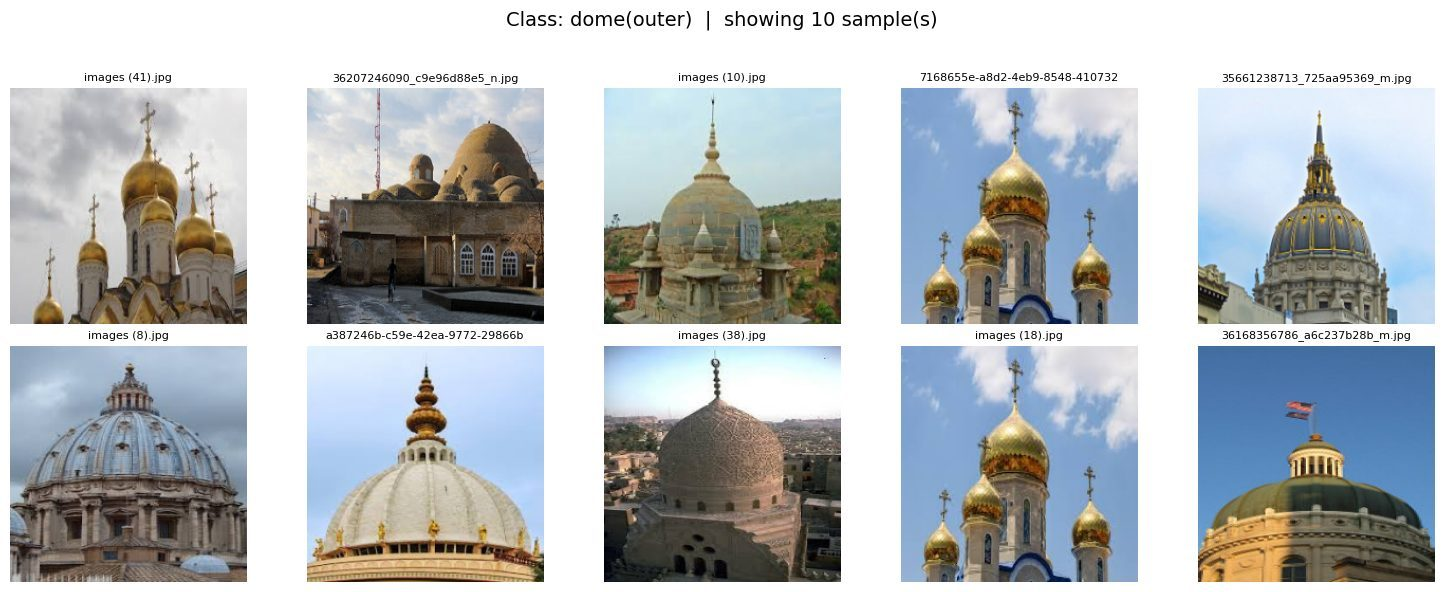

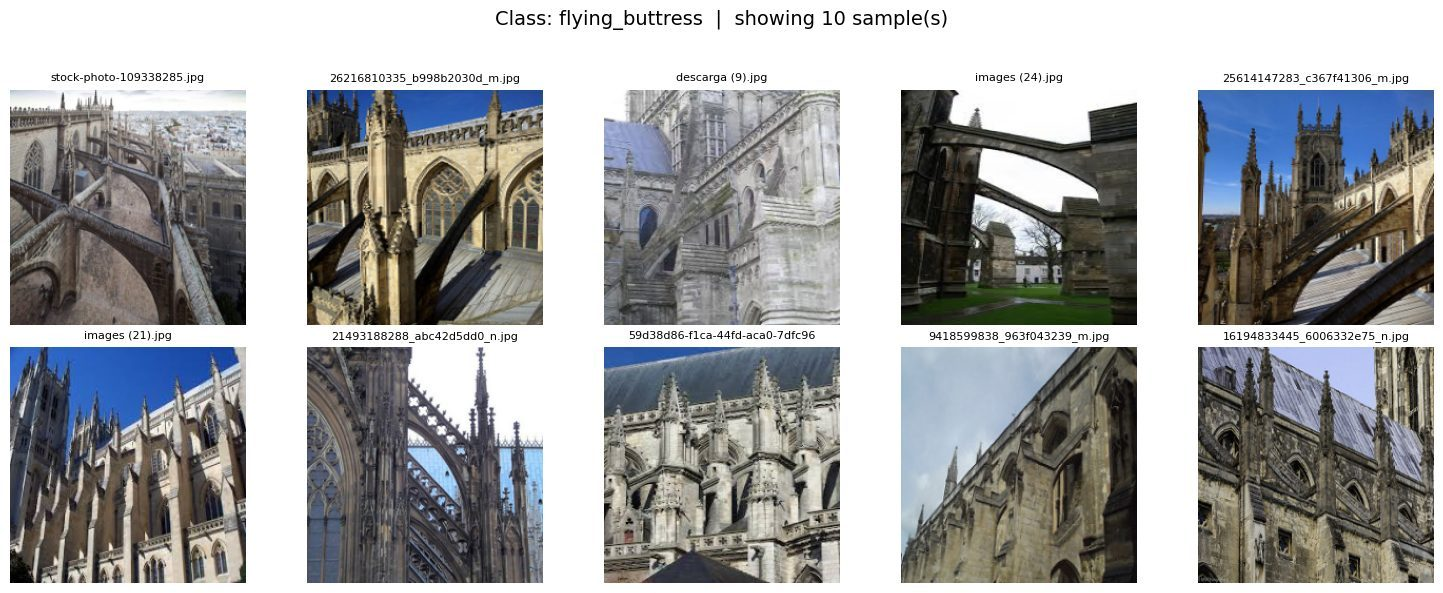

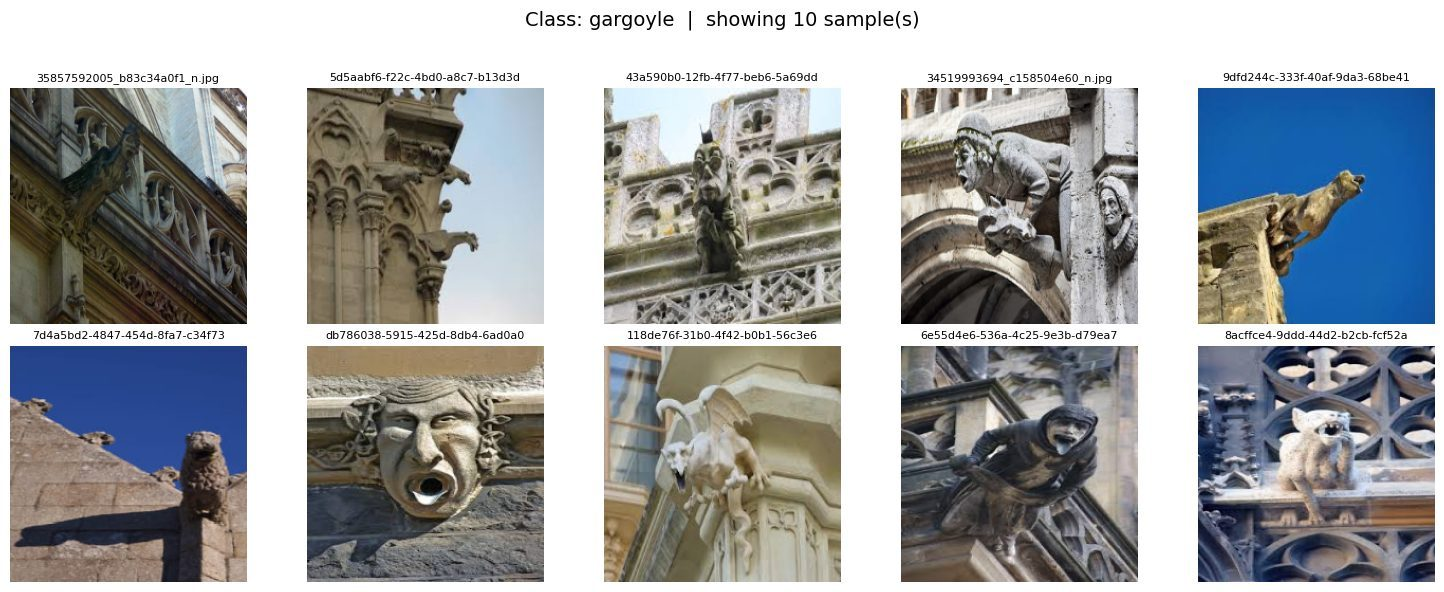

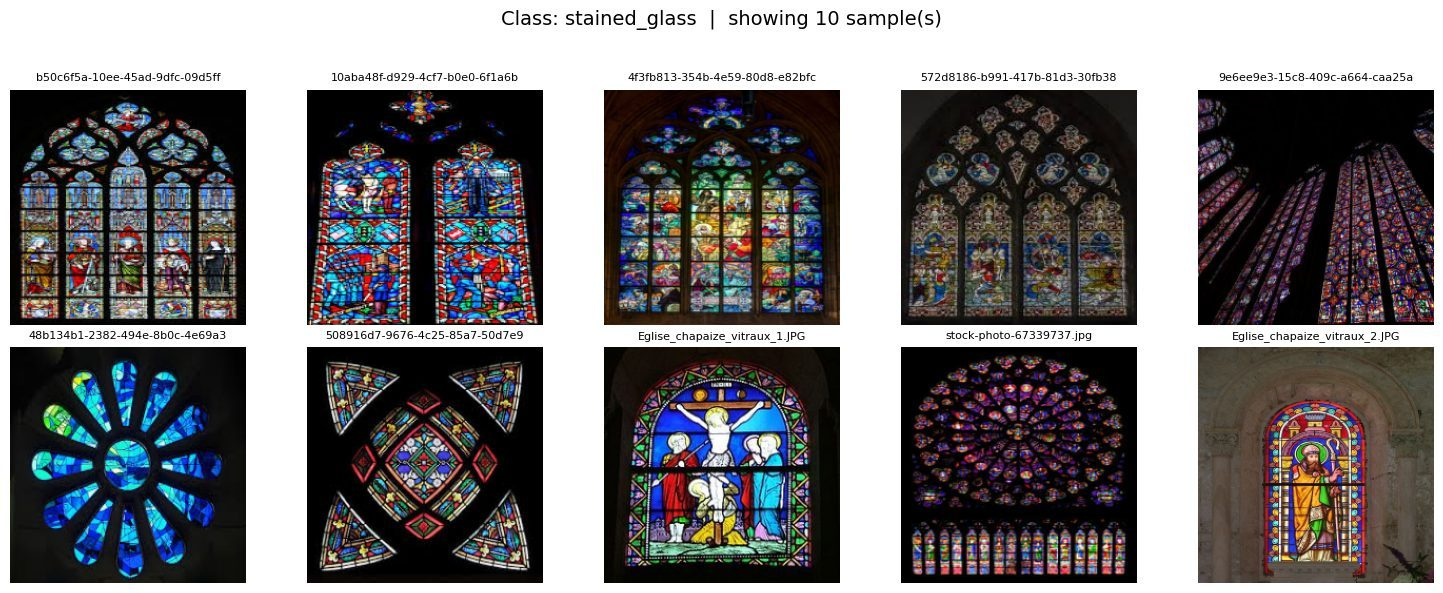

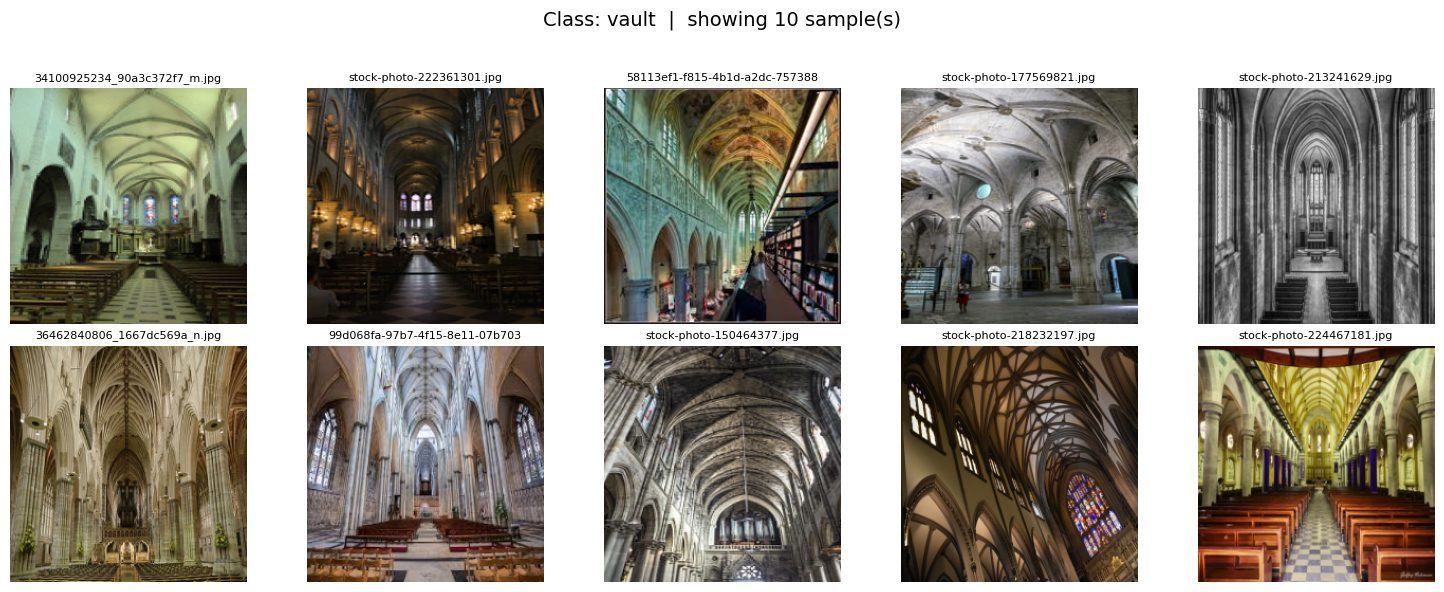

In [ ]:
# ==== Point 1: Plot 8–10 sample images per class ====
import os, glob, random, math
import cv2
import matplotlib.pyplot as plt

# Your actual folders (post-unzip)
TRAIN_DIR = "/content/data_structures/train/Stuctures_Dataset"
TEST_DIR  = "/content/data_structures/test/Dataset_test/Dataset_test_original_1478"

# Config
SAMPLES_PER_CLASS = 10          # set to 8–10 as required
IMG_SIZE = (224, 224)           # display size (not training preprocessing)
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Utility: list class folders
def list_classes(root):
    return sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))])

# Utility: gather image paths for a class (common extensions)
IMG_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp", ".JPG", ".PNG")
def get_image_paths(folder):
    return [p for p in glob.glob(os.path.join(folder, "*")) if p.endswith(IMG_EXT)]

# Utility: read image with OpenCV (BGR->RGB) + optional resize
def read_rgb(path, target_size=None):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Failed to read: {path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if target_size is not None:
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
    return img

# Helper to plot a grid of images for a single class
def plot_class_samples(class_name, class_dir, samples=10, img_size=(224,224)):
    paths = get_image_paths(class_dir)
    if not paths:
        print(f"[WARN] No images found for class '{class_name}' in {class_dir}")
        return
    k = min(samples, len(paths))
    sel = random.sample(paths, k)

    cols = 5 if k > 5 else k
    rows = math.ceil(k / cols)

    plt.figure(figsize=(3*cols, 3*rows))
    plt.suptitle(f"Class: {class_name}  |  showing {k} sample(s)", fontsize=14)
    for i, p in enumerate(sel, 1):
        img = read_rgb(p, target_size=img_size)
        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.title(os.path.basename(p)[:30], fontsize=8)
        plt.axis("off")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Sanity: list classes and counts (train + test) ---
def count_by_class(root):
    classes = list_classes(root)
    return {c: len(get_image_paths(os.path.join(root, c))) for c in classes}

print("Train classes & counts:")
train_classes = list_classes(TRAIN_DIR)
print({c: count_by_class(TRAIN_DIR)[c] for c in train_classes})

print("\nTest classes & counts:")
test_classes = list_classes(TEST_DIR)
print({c: count_by_class(TEST_DIR)[c] for c in test_classes})

# --- Plot 8–10 samples per class for TRAIN set ---
for cls in train_classes:
    plot_class_samples(cls, os.path.join(TRAIN_DIR, cls),
                       samples=SAMPLES_PER_CLASS, img_size=IMG_SIZE)

#visualize TEST set samples per class
for cls in test_classes:
  plot_class_samples(cls, os.path.join(TEST_DIR, cls),
                     samples=SAMPLES_PER_CLASS, img_size=IMG_SIZE)


In [24]:
# ==== Point 2: Select CNN + configure transfer learning (load pre-trained weights) ====
import os, glob
import tensorflow as tf

# Use your actual folders (post-unzip)
TRAIN_DIR = "/content/data_structures/train/Stuctures_Dataset"
TEST_DIR  = "/content/data_structures/test/Dataset_test/Dataset_test_original_1478"

# ---- Discover classes from train dir ----
CLASS_NAMES = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])
NUM_CLASSES = len(CLASS_NAMES)
print(f"Detected {NUM_CLASSES} classes:\n{CLASS_NAMES}")

# ---- Hyperparams / image size ----
IMG_SIZE = 224   # EfficientNetB0 default
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# ---- Choose backbone: EfficientNetB0 ----
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import efficientnet

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling="avg"   # global average pooling so we can attach a dense head next
)

# Freeze all convolutional layers (initial transfer-learning phase)
base_model.trainable = False

# Prepare an input -> base -> pooled output graph we will extend in Point 4
inputs = layers.Input(shape=INPUT_SHAPE, name="image")
# EfficientNet expects pixels scaled to [0,255] then internally rescales; use its preprocess if you build pipelines later
x = base_model(inputs, training=False)  # important: pass training=False when base is frozen
# (No classification head yet; we’ll add Dense/Dropout in Point 4)
backbone_output = x

# Create a temporary model object to inspect shapes; we'll finalize in Point 4
backbone_model = Model(inputs, backbone_output, name="efficientnetb0_backbone_frozen")
backbone_model.summary(line_length=120)

print("\nBackbone ready. Next (Point 4): add Dense layers + Dropout head for", NUM_CLASSES, "classes.")


Detected 10 classes:
['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']


Model: "efficientnetb0_backbone_frozen"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                        ┃ Output Shape                           ┃               Para
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ image (InputLayer)                                  │ (None, 224, 224, 3)                    │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ efficientnetb0 (Functional)                         │ (None, 1280)                           │             4,049,
└─────────────────────────────────────────────────────┴────────────────────────────────────────┴───────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)


Backbone ready. Next (Point 4): add Dense layers + Dropout head for 10 classes.


In [25]:
# ==== Point 3: Freeze all conv layers (transfer learning) & prep fine-tune utility ====
import tensorflow as tf
from tensorflow.keras import layers, Model

# If you ran Point 2, base_model/backbone_model already exist. If not, rebuild minimal backbone.
if 'base_model' not in globals():
    INPUT_SHAPE = (224, 224, 3)
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False, weights="imagenet", input_shape=INPUT_SHAPE, pooling="avg"
    )
    print("[Info] Rebuilt base_model because it wasn't found in the session.")

# 1) Freeze the entire convolutional base
for layer in base_model.layers:
    layer.trainable = False

# 2) Recreate backbone graph if missing
if 'backbone_model' not in globals():
    inputs = layers.Input(shape=base_model.input_shape[1:], name="image")
    x = base_model(inputs, training=False)   # keep base in inference mode while frozen
    backbone_model = Model(inputs, x, name="efficientnetb0_backbone_frozen")

# 3) Sanity check: report trainable vs. frozen layers
total_layers = len(base_model.layers)
trainable_layers = sum(int(l.trainable) for l in base_model.layers)
print(f"Backbone layers: {total_layers} | trainable: {trainable_layers} | frozen: {total_layers - trainable_layers}")

# 4) Utility for later fine-tuning (do NOT run now; use after initial head training)
def set_finetune_from(layer_name=None, unfreeze_blocks=0):
    """
    Unfreeze part of the backbone for fine-tuning AFTER training the head.
    - layer_name: unfreezes from this layer (inclusive) to the end.
    - unfreeze_blocks: unfreezes the last N 'block' groups (EfficientNet naming).
    """
    # Refreeze everything first
    for l in base_model.layers:
        l.trainable = False

    if layer_name:
        start = False
        for l in base_model.layers:
            if l.name == layer_name:
                start = True
            if start:
                l.trainable = True
    elif unfreeze_blocks > 0:
        block_idxs = [i for i, l in enumerate(base_model.layers) if 'block' in l.name]
        if block_idxs:
            cutoff = block_idxs[-unfreeze_blocks] if unfreeze_blocks <= len(block_idxs) else block_idxs[0]
            for i, l in enumerate(base_model.layers):
                if i >= cutoff:
                    l.trainable = True

    tr = sum(int(l.trainable) for l in base_model.layers)
    print(f"[set_finetune_from] trainable layers now: {tr}/{len(base_model.layers)}")

# Example for later (commented out):
# set_finetune_from(unfreeze_blocks=2)  # unfreeze last 2 blocks for fine-tuning


Backbone layers: 239 | trainable: 0 | frozen: 239


In [26]:
# ==== Point 4: Add classification head (Dense + Dropout) ====
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers

# Assumes these exist from Points 2–3:
# - base_model (EfficientNetB0 include_top=False, pooling="avg", trainable=False)
# - NUM_CLASSES (your 10 classes)
# - INPUT_SHAPE = (224, 224, 3)

assert 'base_model' in globals(), "Run Point 2 first to create base_model."
assert 'NUM_CLASSES' in globals(), "NUM_CLASSES missing. Re-run Point 2 to detect classes."
assert 'INPUT_SHAPE' in globals(), "INPUT_SHAPE missing. Re-run Point 2."

# Build the full model
inputs = layers.Input(shape=INPUT_SHAPE, name="image")
x = base_model(inputs, training=False)             # keep base in inference mode while frozen
x = layers.BatchNormalization(name="bn_backbone")(x)

# Classification head (tunable hyperparams)
x = layers.Dense(512, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-4),
                 name="dense_512")(x)
x = layers.BatchNormalization(name="bn_1")(x)
x = layers.Dropout(0.4, name="dropout_1")(x)

x = layers.Dense(128, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-4),
                 name="dense_128")(x)
x = layers.BatchNormalization(name="bn_2")(x)
x = layers.Dropout(0.3, name="dropout_2")(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="predictions")(x)

model = Model(inputs, outputs, name="efficientnetb0_classifier")

# Double-check base is still frozen
for l in base_model.layers:
    l.trainable = False

model.summary(line_length=120)


Model: "efficientnetb0_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                        ┃ Output Shape                           ┃               Para
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ image (InputLayer)                                  │ (None, 224, 224, 3)                    │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ efficientnetb0 (Functional)                         │ (None, 1280)                           │             4,049,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ bn_backbone (BatchNormalization)                    │ (None, 1280)                           │                 5,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_512 (Dense)                                   │ (None, 512)                            │               655,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ bn_1 (BatchNormalization)                           │ (None, 512)                            │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_1 (Dropout)                                 │ (None, 512)                            │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_128 (Dense)                                   │ (None, 128)                            │                65,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ bn_2 (BatchNormalization)                           │ (None, 128)                            │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_2 (Dropout)                                 │ (None, 128)                            │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ predictions (Dense)                                 │ (None, 10)                             │                 1,
└─────────────────────────────────────────────────────┴────────────────────────────────────────┴───────────────────

 Total params: 4,780,077 (18.23 MB)

 Trainable params: 726,666 (2.77 MB)

 Non-trainable params: 4,053,411 (15.46 MB)

In [27]:
# ==== Point 5: Compile the model ====
import tensorflow as tf
from tensorflow.keras import optimizers, losses, metrics
import numpy as np # Import numpy

assert 'model' in globals(), "Run Point 4 first to build the model."

# Optimizer: slightly higher LR while backbone is frozen (we're training the head)
initial_lr = 1e-3
opt = optimizers.Adam(learning_rate=initial_lr)

# Loss/metrics: for one-hot labels (class_mode='categorical' in generators)
model.compile(
    optimizer=opt,
    loss=losses.CategoricalCrossentropy(label_smoothing=0.0),
    metrics=[
        metrics.CategoricalAccuracy(name="accuracy"),
        metrics.TopKCategoricalAccuracy(k=3, name="top3_acc"),
    ],
)

# Quick sanity: count trainable vs total parameters
trainable_count = np.sum([np.prod(v.shape) for v in model.trainable_variables])
total_count = np.sum([np.prod(v.shape) for v in model.variables])
print(f"Compiled. Trainable params: {trainable_count:,} / Total params: {total_count:,}")
print("Next (Point 6): define a callback to stop when val_accuracy reaches your target.")

Compiled. Trainable params: 726,666 / Total params: 4,780,099.0
Next (Point 6): define a callback to stop when val_accuracy reaches your target.


In [28]:
# ==== Point 6: Early stopping when validation accuracy hits target ====
import tensorflow as tf

class ValAccThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.95):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.threshold:
            print(f"\n[INFO] Reached {val_acc:.4f} val_accuracy — stopping training.")
            self.model.stop_training = True

# Example: stop if val_accuracy ≥ 92%
val_acc_cb = ValAccThresholdCallback(threshold=0.92)

# You can combine with EarlyStopping for patience-based stopping:
early_stop_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)

print("Callbacks ready: val_acc_cb (threshold) and early_stop_cb (patience)")


Callbacks ready: val_acc_cb (threshold) and early_stop_cb (patience)


In [29]:
# ==== Point 7: Setup datasets & review sample counts ====
# --- Scan for corrupted/non-decodable images and quarantine them ---
import os, shutil, pathlib
from PIL import Image

TRAIN_DIR = "/content/data_structures/train/Stuctures_Dataset"
TEST_DIR  = "/content/data_structures/test/Dataset_test/Dataset_test_original_1478"
QUAR_DIR  = "/content/bad_images_quarantine"
os.makedirs(QUAR_DIR, exist_ok=True)

VALID_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp", ".JPG", ".PNG"}

bad_files = []

def scan_and_quarantine(root):
    for cls in sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]):
        cls_folder = os.path.join(root, cls)
        for fname in os.listdir(cls_folder):
            src = os.path.join(cls_folder, fname)
            if not os.path.isfile(src):
                continue
            if pathlib.Path(src).suffix not in VALID_EXTS:
                bad_files.append(src)
                continue
            try:
                with Image.open(src) as im:
                    im.verify()  # quick integrity check
                # Reopen to ensure load() works too (some files pass verify but fail load)
                with Image.open(src) as im:
                    im.load()
            except Exception:
                bad_files.append(src)

    # Move bad files (keep class subfolders)
    for i, src in enumerate(bad_files, 1):
        rel = os.path.relpath(src, root)
        dst = os.path.join(QUAR_DIR, rel)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        try:
            shutil.move(src, dst)
        except Exception:
            # If move fails (e.g., cross-device), copy then remove
            shutil.copy2(src, dst)
            os.remove(src)

    return len(bad_files)

n_train_bad = scan_and_quarantine(TRAIN_DIR)
n_test_bad  = scan_and_quarantine(TEST_DIR)

print(f"Quarantined {n_train_bad} bad files from TRAIN and {n_test_bad} from TEST.")
print(f"Quarantine folder: {QUAR_DIR}")

# --- Recreate TF datasets after cleaning ---
import tensorflow as tf
import os

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
preprocess = tf.keras.applications.efficientnet.preprocess_input

def build_ds(root, shuffle, batch_size=BATCH_SIZE):
    ds = tf.keras.utils.image_dataset_from_directory(
        root,
        image_size=IMG_SIZE,
        batch_size=batch_size,
        label_mode="categorical",
        shuffle=shuffle,
        seed=42
    )
    ds = ds.map(lambda x,y: (preprocess(tf.cast(x, tf.float32)), y),
                num_parallel_calls=AUTOTUNE)
    return ds.cache().prefetch(AUTOTUNE)

train_ds = build_ds("/content/data_structures/train/Stuctures_Dataset", shuffle=True)
val_ds   = build_ds("/content/data_structures/test/Dataset_test/Dataset_test_original_1478", shuffle=False)

print("Datasets rebuilt.")



Quarantined 0 bad files from TRAIN and 4 from TEST.
Quarantine folder: /content/bad_images_quarantine
Found 10235 files belonging to 10 classes.
Found 1473 files belonging to 10 classes.
Datasets rebuilt.


In [30]:
# ==== Point 8: Train the model (NO augmentation) ====
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

assert 'model' in globals(), "Run Points 4–5 first."
assert 'train_ds' in globals() and 'val_ds' in globals(), "Run the UPDATED Point 7 (with preprocess)."
assert 'val_acc_cb' in globals() and 'early_stop_cb' in globals(), "Run Point 6 for callbacks."

ckpt_path = "/content/efficientnetb0_noaug_best.keras"
ckpt_cb = ModelCheckpoint(
    ckpt_path, monitor="val_accuracy", save_best_only=True, mode="max", verbose=1
)

rlr_cb = ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.5, patience=2, min_lr=1e-6, verbose=1
)

EPOCHS = 20  # adjust if needed

history_noaug = model.fit(
    train_ds,                 # already preprocessed in Point 7
    validation_data=val_ds,   # already preprocessed in Point 7
    epochs=EPOCHS,
    callbacks=[rlr_cb, ckpt_cb],
    verbose=1
)

print("Training (no augmentation) finished. Best model saved to:", ckpt_path)


Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8333 - loss: 0.6466 - top3_acc: 0.9366
Epoch 1: val_accuracy improved from -inf to 0.94773, saving model to /content/efficientnetb0_noaug_best.keras
320/320 ━━━━━━━━━━━━━━━━━━━━ 73s 141ms/step - accuracy: 0.8335 - loss: 0.6459 - top3_acc: 0.9367 - val_accuracy: 0.9477 - val_loss: 0.2771 - val_top3_acc: 0.9905 - learning_rate: 0.0010
Epoch 2/20
319/320 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9541 - loss: 0.2439 - top3_acc: 0.9977
Epoch 2: val_accuracy did not improve from 0.94773
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9541 - loss: 0.2439 - top3_acc: 0.9977 - val_accuracy: 0.9470 - val_loss: 0.2762 - val_top3_acc: 0.9952 - learning_rate: 0.0010
Epoch 3/20
319/320 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9638 - loss: 0.2117 - top3_acc: 0.9973
Epoch 3: val_accuracy improved from 0.94773 to 0.95384, saving model to /content/efficientnetb0_noaug_best.keras
320/320 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms

In [31]:
#Do this if runtime restarted
# Detect classes (train dir after unzip)
import os
TRAIN_DIR = "/content/data_structures/train/Stuctures_Dataset"
CLASS_NAMES = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])
NUM_CLASSES = len(CLASS_NAMES)
INPUT_SHAPE = (224, 224, 3)
print(NUM_CLASSES, "classes:", CLASS_NAMES)

# Backbone (EfficientNetB0 frozen)
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False, weights="imagenet", input_shape=INPUT_SHAPE, pooling="avg"
)
base_model.trainable = False

# Head
inputs = layers.Input(shape=INPUT_SHAPE, name="image")
x = base_model(inputs, training=False)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs, outputs)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy", tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top3_acc")]
)

# Load your best no-augmentation weights
model.load_weights("/content/efficientnetb0_noaug_best.keras")



10 classes: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [1]:
# === Point 10 recovery (no `classes=` argument version) ===
# === RESET & DIAGNOSE, then AUG TRAIN (robust to class-order differences) ===
import os, tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Paths
TRAIN_DIR = "/content/data_structures/train/Stuctures_Dataset"
VAL_DIR   = "/content/data_structures/test/Dataset_test/Dataset_test_original_1478"
CKPT_NOAUG = "/content/efficientnetb0_noaug_best.keras"    # good baseline
CKPT_AUG   = "/content/efficientnetb0_aug_best_fixed.keras" # new save

assert os.path.exists(CKPT_NOAUG), "Missing baseline checkpoint at " + CKPT_NOAUG

# 0) Load the baseline FULL model (the classifier WITHOUT aug wrapper)
baseline = tf.keras.models.load_model(CKPT_NOAUG, compile=False)

# Recompile (same loss/metrics shape as before)
baseline.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
             tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top3_acc")]
)

# 1) Build RAW val dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
val_raw = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR, image_size=IMG_SIZE, batch_size=BATCH_SIZE,
    label_mode="categorical", shuffle=False
)
val_classes = val_raw.class_names
print("Val classes:", val_classes)

# 2) Apply the SAME preprocessing as your successful no-aug run
#    (We preprocessed in the dataset pipeline then fed into `baseline`.)
AUTOTUNE = tf.data.AUTOTUNE
preprocess = tf.keras.applications.efficientnet.preprocess_input

val_prep = val_raw.map(lambda x,y: (preprocess(tf.cast(x, tf.float32)), y),
                       num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)

# 3) SANITY CHECK: evaluate baseline on current val
print("Evaluating baseline no-aug model on current val set...")
b_loss, b_acc, b_top3 = baseline.evaluate(val_prep, verbose=0)
print(f"[Baseline sanity] val_acc={b_acc:.4f}, top3={b_top3:.4f}")

# If baseline sanity is LOW (<0.8), labels might be misaligned due to class-order differences
# We'll rebuild TRAIN *and* VAL and explicitly remap labels so both align with TRAIN order.

def build_and_align(train_dir, val_dir, batch=32):
    train_raw = tf.keras.utils.image_dataset_from_directory(
        train_dir, image_size=IMG_SIZE, batch_size=batch,
        label_mode="categorical", shuffle=True, seed=42
    )
    val_raw  = tf.keras.utils.image_dataset_from_directory(
        val_dir, image_size=IMG_SIZE, batch_size=batch,
        label_mode="categorical", shuffle=False
    )
    train_classes = train_raw.class_names
    val_classes = val_raw.class_names
    print("Train classes:", train_classes)
    print("Val classes:  ", val_classes)

    # Build permutation to map VAL labels -> TRAIN order (identity if equal)
    # y is one-hot in val/train. We want both to be TRAIN order for the model head.
    import numpy as np
    perm = []
    for cls in train_classes:
        try:
            perm.append(val_classes.index(cls))
        except ValueError:
            raise ValueError(f"Class {cls} missing from VAL set.")
    perm = tf.constant(perm, dtype=tf.int32)

    def align_to_train_order(y):
        # y is one-hot in VAL order; gather to TRAIN order
        return tf.gather(y, perm, axis=-1)

    preprocess = tf.keras.applications.efficientnet.preprocess_input
    AUTOTUNE = tf.data.AUTOTUNE

    train_prep = (train_raw
                  .map(lambda x,y: (preprocess(tf.cast(x, tf.float32)), y), num_parallel_calls=AUTOTUNE)
                  .cache().prefetch(AUTOTUNE))

    val_prep = (val_raw
                .map(lambda x,y: (preprocess(tf.cast(x, tf.float32)), align_to_train_order(y)),
                     num_parallel_calls=AUTOTUNE)
                .cache().prefetch(AUTOTUNE))
    return train_prep, val_prep, train_classes

# If sanity low, realign; if sanity good, still rebuild train with identical preprocessing for aug wrapper
realign_needed = b_acc < 0.80

train_ds_prep, val_ds_prep, TRAIN_CLASSES = build_and_align(TRAIN_DIR, VAL_DIR, batch=32)

# 4) Gentle augmentation INSIDE the model graph, then SAME preprocess (to be identical)
augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.10),
    layers.RandomTranslation(0.03, 0.03),
    layers.RandomContrast(0.10),
], name="augmentation")

# Build an aug wrapper: inputs -> aug -> preprocess -> baseline
inp = layers.Input(shape=IMG_SIZE + (3,), name="raw_images")
x   = augmentation(inp, training=True)
x   = layers.Lambda(lambda t: preprocess(tf.cast(t, tf.float32)), name="efnet_preprocess")(x)
out = baseline(x)
aug_model = Model(inp, out, name="aug_wrapper")

# Lower LR to avoid forgetting your good head weights
aug_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
             tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top3_acc")]
)

ckpt_cb = ModelCheckpoint(CKPT_AUG, monitor="val_accuracy",
                          save_best_only=True, mode="max", verbose=1, save_weights_only=False)
rlr_cb  = ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=2, min_lr=1e-6, verbose=1)

print("Starting short augmented training (8 epochs) with aligned labels & identical preprocessing...")
hist = aug_model.fit(
    train_ds_prep,
    validation_data=val_ds_prep,
    epochs=8,
    callbacks=[rlr_cb, ckpt_cb],
    verbose=1
)

print("Done. Best augmented model saved to:", CKPT_AUG)



Found 1473 files belonging to 10 classes.
Val classes: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
Evaluating baseline no-aug model on current val set...
[Baseline sanity] val_acc=0.9613, top3=0.9966
Found 10235 files belonging to 10 classes.
Found 1473 files belonging to 10 classes.
Train classes: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
Val classes:   ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
Starting short augmented training (8 epochs) with aligned labels & identical preprocessing...
Epoch 1/8
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9655 - loss: 0.2129 - top3_acc: 0.9982
Epoch 1: val_accuracy improved from -inf to 0.95587, saving model to /content/efficientnetb0_aug_best_fixed.keras
320/320 ━━━━━━━━━━━━━━━━━━━━ 

[skip] No augmentation: no history object found.


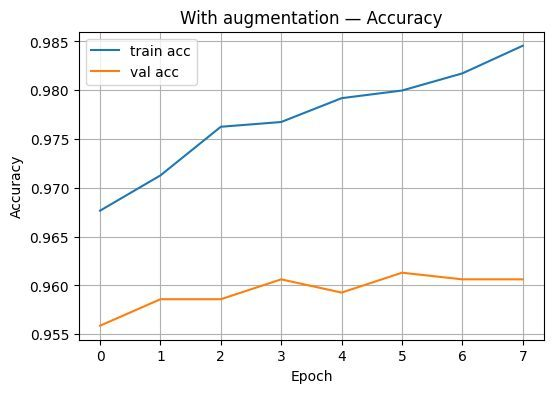

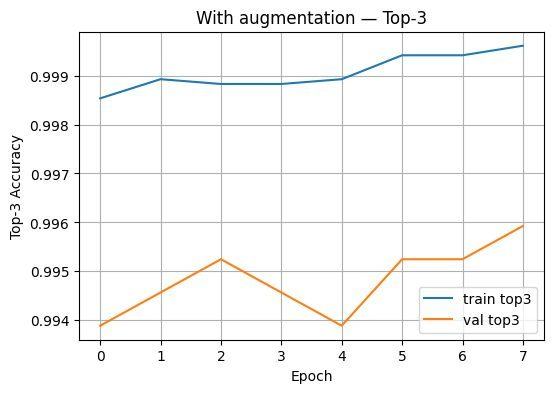

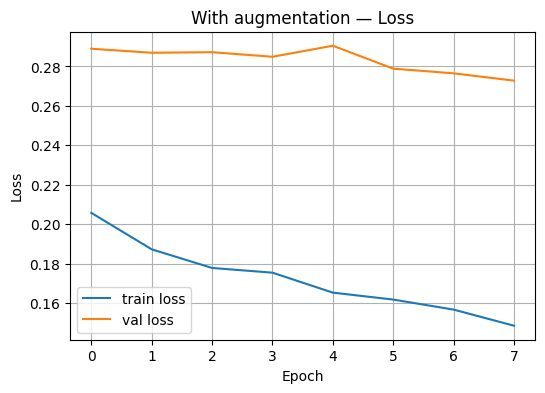

In [2]:
# ==== Point 12: Plot training vs validation curves (handles no-aug & aug if available) ====
import matplotlib.pyplot as plt

def plot_history(hist, title):
    if hist is None:
        print(f"[skip] {title}: no history object found.")
        return
    H = hist.history
    # Try common key variants
    acc_keys  = [k for k in H.keys() if k in ["accuracy","categorical_accuracy"]]
    val_keys  = [k for k in H.keys() if k in ["val_accuracy","val_categorical_accuracy"]]
    loss_key  = "loss" if "loss" in H else None
    vloss_key = "val_loss" if "val_loss" in H else None
    top3_key  = "top3_acc" if "top3_acc" in H else ("top_k_categorical_accuracy" if "top_k_categorical_accuracy" in H else None)
    vtop3_key = f"val_{top3_key}" if top3_key and f"val_{top3_key}" in H else None

    # Accuracy
    if acc_keys and val_keys:
        plt.figure(figsize=(6,4))
        plt.plot(H[acc_keys[0]], label="train acc")
        plt.plot(H[val_keys[0]], label="val acc")
        plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title(f"{title} — Accuracy"); plt.legend(); plt.grid(True)
        plt.show()

    # Top-3 (optional)
    if top3_key and vtop3_key:
        plt.figure(figsize=(6,4))
        plt.plot(H[top3_key], label="train top3")
        plt.plot(H[vtop3_key], label="val top3")
        plt.xlabel("Epoch"); plt.ylabel("Top-3 Accuracy"); plt.title(f"{title} — Top-3"); plt.legend(); plt.grid(True)
        plt.show()

    # Loss
    if loss_key and vloss_key:
        plt.figure(figsize=(6,4))
        plt.plot(H[loss_key], label="train loss")
        plt.plot(H[vloss_key], label="val loss")
        plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title(f"{title} — Loss"); plt.legend(); plt.grid(True)
        plt.show()

# Try to plot both histories if they exist in memory
try:
    plot_history(history_noaug, "No augmentation")
except NameError:
    plot_history(None, "No augmentation")

try:
    plot_history(hist if 'hist' in globals() else history_aug, "With augmentation")
except NameError:
    plot_history(None, "With augmentation")


Safe load failed for /content/efficientnetb0_aug_best_fixed.keras: The `function` of this `Lambda` layer is a Python lambda. Deserializing it is unsafe. If you trust the source of the config artifact, you can override this error by passing `safe_mode=False` to `from_config()`, or calling `keras.config.enable_unsafe_deserialization().
Unsafe load also failed for /content/efficientnetb0_aug_best_fixed.keras: Exception encountered when calling Lambda.call().

We could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_550>',)
  • kwargs={'mask': 'None'}
Loaded model (safe): /content/efficientnetb0_noaug_best.keras
Found 10235 files belonging to 10 classes.
Train classes: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle

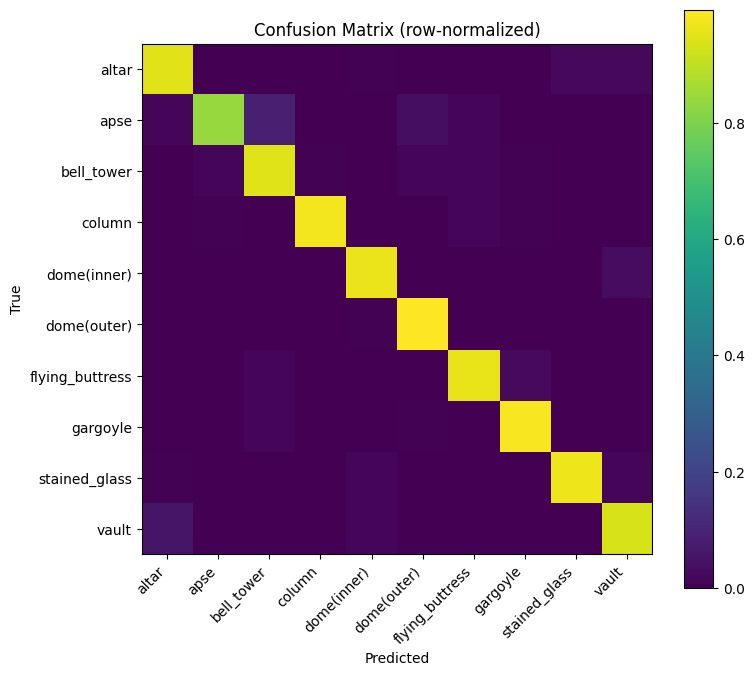

In [1]:
# ==== EVALUATION: confusion matrix + per-class accuracy on TEST ====
import os, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# ---- Paths
TRAIN_DIR = "/content/data_structures/train/Stuctures_Dataset"
TEST_DIR  = "/content/data_structures/test/Dataset_test/Dataset_test_original_1478"

CANDIDATE_CKPTS = [
    "/content/efficientnetb0_aug_best_fixed.keras",
    # older names you may have:
    "/content/efficientnetb0_aug_best.keras",
    "/content/efficientnetb0_noaug_best.keras",
]

# ---- Load model (try aug model first; fall back to no-aug). Handle Lambda safely.
def load_best_model():
    # try safe load first
    for p in CANDIDATE_CKPTS:
        if os.path.exists(p):
            try:
                m = tf.keras.models.load_model(p, compile=False)
                print("Loaded model (safe):", p)
                return m
            except Exception as e:
                print(f"Safe load failed for {p}: {e}")
                # try unsafe only if you trust your own file
                try:
                    import keras
                    keras.config.enable_unsafe_deserialization()
                    m = keras.models.load_model(p, compile=False)
                    print("Loaded model (unsafe allowed):", p)
                    return m
                except Exception as e2:
                    print(f"Unsafe load also failed for {p}: {e2}")
    raise FileNotFoundError("No usable checkpoint found in CANDIDATE_CKPTS.")

model = load_best_model()

# ---- Build small dataset to read TRAIN class order (source of truth)
IMG_SIZE = (224, 224)
BATCH = 32
train_tmp = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, image_size=IMG_SIZE, batch_size=BATCH,
    label_mode="categorical", shuffle=False
)
train_classes = train_tmp.class_names
num_classes = len(train_classes)
print("Train classes:", train_classes)

# ---- TEST dataset (labels may be in a different order)
test_raw = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR, image_size=IMG_SIZE, batch_size=BATCH,
    label_mode="categorical", shuffle=False
)
test_classes = test_raw.class_names
print("Test classes: ", test_classes)

# ---- Align TEST one-hot labels to TRAIN order
perm = tf.constant([test_classes.index(c) for c in train_classes], dtype=tf.int32)
def align_to_train_order(y):
    return tf.gather(y, perm, axis=-1)

preprocess = tf.keras.applications.efficientnet.preprocess_input
AUTOTUNE = tf.data.AUTOTUNE

test_ds = (test_raw
           .map(lambda x,y: (preprocess(tf.cast(x, tf.float32)), align_to_train_order(y)),
                num_parallel_calls=AUTOTUNE)
           .cache()
           .prefetch(AUTOTUNE))

# ---- Evaluate
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
             tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top3_acc")]
)
loss, acc, top3 = model.evaluate(test_ds, verbose=0)
print(f"\nTest metrics — acc: {acc:.4f}, top3: {top3:.4f}, loss: {loss:.4f}")

# ---- Predictions for confusion matrix
y_true = []
for _, y in test_ds.unbatch().batch(1024):
    y_true.append(y.numpy())
y_true = np.concatenate(y_true, axis=0)
true_idx = y_true.argmax(axis=1)

y_pred = model.predict(test_ds, verbose=0)
pred_idx = y_pred.argmax(axis=1)

cm = confusion_matrix(true_idx, pred_idx, labels=range(num_classes))
per_class_acc = (cm.diagonal() / cm.sum(axis=1).clip(min=1)).astype(float)

print("\nPer-class accuracy:")
for c, a in zip(train_classes, per_class_acc):
    print(f"  {c:16s} : {a:0.4f}")

print("\nClassification report:")
print(classification_report(true_idx, pred_idx, target_names=train_classes, digits=4))

# ---- Pretty confusion matrix (row-normalized)
cm_norm = cm / cm.sum(axis=1, keepdims=True).clip(min=1)
plt.figure(figsize=(8,7))
plt.imshow(cm_norm, interpolation='nearest')
plt.title("Confusion Matrix (row-normalized)")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, train_classes, rotation=45, ha='right')
plt.yticks(tick_marks, train_classes)
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout()
plt.show()


No‑augmentation run: training accuracy shot up (~0.99+) while val accuracy plateaued ~0.96 and val loss crept up late → mild overfitting.

Augmented run (after fixing class‑order + preprocessing): val accuracy stayed in the ~0.96 band with steadier loss → regularization worked without hurting generalization.

Early stopping + LR scheduling did the right thing (training didn’t waste epochs once val stopped improving).